In [9]:
import threading
import time
from rich.console import Console
from rich.logging import RichHandler
import logging
import websocket

import requests
import websocket
import json
import time
import os
from dotenv import load_dotenv
from urllib.parse import urlencode
import hmac
import hashlib
import copy

In [2]:
real_time_prices = []

def run_websocket():
    global real_time_prices
    def on_message(ws, message):
        global real_time_prices
        message_ = json.loads(message)
        real_time_prices.append({"t": message_['T'], "p":message_['p']})


    ws = websocket.WebSocketApp("wss://fstream.binance.com/ws/1000pepeusdc@aggTrade", on_message=on_message)

    ws.run_forever()


In [3]:
websocket_thread = threading.Thread(target=run_websocket)
websocket_thread.start()


In [15]:
prices = copy.deepcopy(real_time_prices)

In [16]:
len(prices)

3824

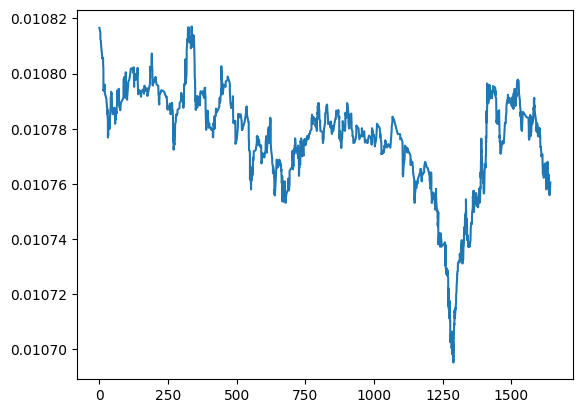

In [17]:
from matplotlib import pyplot as plt
import numpy as np
plt.plot([(float(x['t']) - float(prices[0]['t']))* 10**(-3) for x in prices], [float(x['p']) for x in prices])

In [131]:
prices_list = [float(x['p']) for x in prices]
time_list= [(float(x['t']) - float(prices[0]['t']))* 10**(-3) for x in prices]


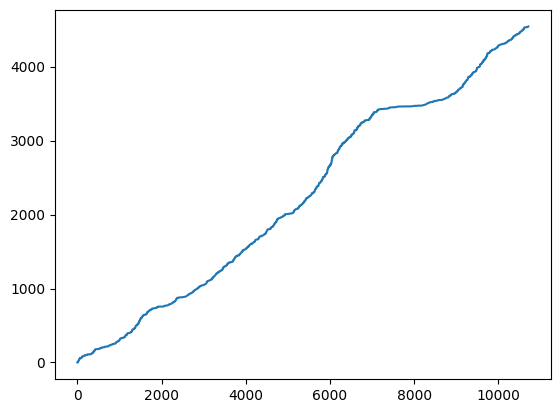

In [132]:
plt.plot(time_list)

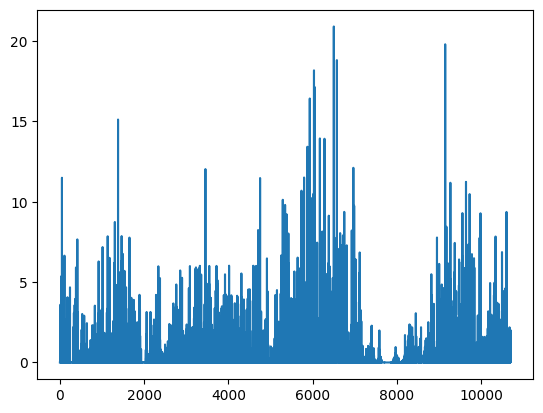

In [133]:
plt.plot([(time_list[i] - time_list[i - 1]) for i in range(1, len(time_list))])

In [134]:
[num for num in  [(time_list[i] - time_list[i - 1]) for i in range(1, len(time_list))]]

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.123,
 0.21300000000000002,
 2.096,
 2.6060000000000003,
 1.8899999999999997,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0019999999999997797,
 0.20200000000000085,
 2.909,
 1.157,
 3.5920000000000005,
 0.0,
 0.472999999999999,
 3.5269999999999992,
 3.1380000000000017,
 3.6389999999999993,
 0.062000000000001165,
 1.0210000000000008,
 0.0,
 0.3819999999999979,
 0.013000000000001677,
 0.5949999999999989,
 2.6290000000000013,
 0.04100000000000037,
 0.0,
 0.17799999999999727,
 0.006000000000000227,
 5.367000000000004,
 0.0,
 0.3129999999999953,
 0.006999999999997897,
 0.0030000000000001137,
 2.679000000000002,
 0.0,
 1.1920000000000002,
 0.0,
 1.2650000000000006,
 0.3710000000000022,
 0.4579999999999984,
 0.32500000000000284,
 0.11699999999999733,
 11.488999999999997,
 0.0040000000000048885,
 0.29399999999999693,
 0.4650000000000034,
 0.0,
 0.0,
 0.0030000000000001137,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.006000000000000227,
 5.314999999999998,
 0.22399999999999665,
 0.0,


(array([8.152e+03, 5.040e+02, 3.420e+02, 2.520e+02, 2.210e+02, 1.520e+02,
        1.320e+02, 1.060e+02, 1.030e+02, 7.400e+01, 7.200e+01, 7.000e+01,
        5.100e+01, 3.900e+01, 3.000e+01, 4.400e+01, 3.600e+01, 3.600e+01,
        2.600e+01, 2.700e+01, 2.000e+01, 2.200e+01, 1.400e+01, 1.800e+01,
        1.100e+01, 1.500e+01, 1.300e+01, 1.100e+01, 2.000e+01, 1.100e+01,
        8.000e+00, 9.000e+00, 5.000e+00, 3.000e+00, 3.000e+00, 5.000e+00,
        3.000e+00, 8.000e+00, 4.000e+00, 2.000e+00, 2.000e+00, 1.000e+00,
        0.000e+00, 1.000e+00, 5.000e+00, 0.000e+00, 2.000e+00, 1.000e+00,
        2.000e+00, 0.000e+00, 2.000e+00, 1.000e+00, 0.000e+00, 2.000e+00,
        2.000e+00, 1.000e+00, 0.000e+00, 2.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
        2.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 0.000e+0

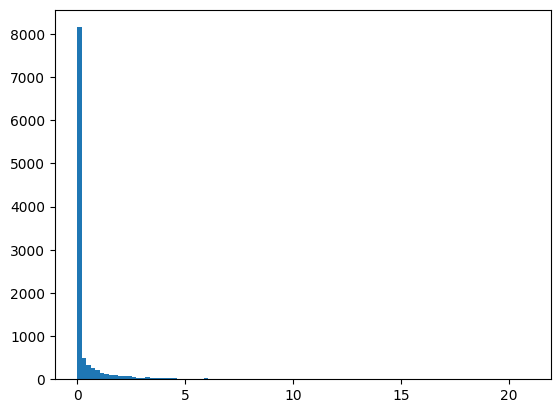

In [135]:

plt.hist(  [num for num in  [(time_list[i] - time_list[i - 1]) for i in range(1, len(time_list))]] , bins=100)


(array([1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 1.000e+00, 1.000e+00,
        2.000e+00, 1.000e+00, 1.000e+00, 6.000e+00, 4.000e+00, 6.000e+00,
        1.200e+01, 1.600e+01, 1.700e+01, 1.300e+01, 3.600e+01, 3.700e+01,
        6.400e+01, 7.500e+01, 1.290e+02, 1.990e+02, 2.680e+02, 5.950e+02,
        8.630e+02, 3.286e+03, 2.688e+03, 9.530e+02, 5.620e+02, 2.740e+02,
        2.370e+02, 1.010e+02, 9.500e+01, 4.700e+01, 3.000e+01, 1.900e+01,
        1.600e+01, 1.800e+01, 8.000e+00, 1.300e+01, 3.000e+00, 3.000e+00,
        4.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+0

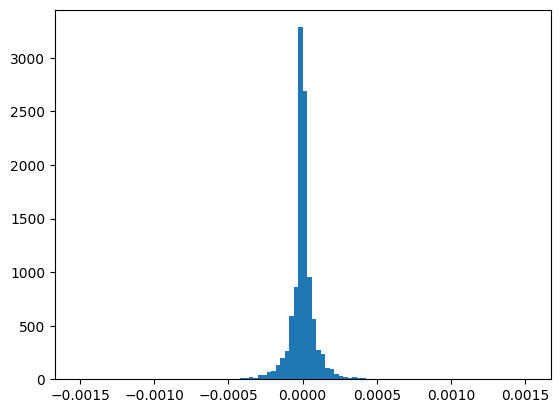

In [136]:
plt.hist([(prices_list[i] / prices_list[i - 1] - 1) for i in range(1, len(prices_list))], bins=100)

In [137]:
data = [[(float(x['t']) - float(prices[0]['t'])) * 10**(-3) , float(x['p'])]for x in prices]

In [138]:
# 计算价格变化达到2%所需的时间
result = []

# 遍历每个时间点
for i in range(len(data)):
    start_time, start_price = data[i]
    found = False
    
    # 遍历后续时间点
    for j in range(i + 1, len(data)):
        current_time, current_price = data[j]
        
        # 计算价格变化百分比
        price_change = (current_price - start_price) / start_price
        
        # 检查价格变化是否达到2%
        if abs(price_change) >= 0.0015:
            time_diff = current_time - start_time
            result.append([start_time, start_price, time_diff])
            found = True
            break
    
    # 如果在后续时间点中没有找到达到2%的变化
    if not found:
        result.append([start_time, start_price, None])


(array([738., 759., 671., 761., 639., 595., 436., 438., 410., 390., 431.,
        271., 315., 276., 205., 232., 227., 238., 155., 147., 108., 114.,
        177., 108.,  84.,  83., 117.,  76.,  47.,  65.,  90.,  89.,  73.,
         37.,  51., 104.,  97.,  62.,  45.,  35.,  24.,  16.,  27.,  24.,
         30.,  78.,  35.,  15.,  32.,  14.,  11.,  11.,  25.,   9.,  40.,
         37.,  13.,   7.,  11.,   4.,   6.,  22.,  22.,  19.,  14.,  15.,
          7.,  24.,   6.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          2.,   6.,   4.,   9.,   1.,   1.,   4.,   5.,   3.,  12.,   6.,
         11.,   9.,   9.,   0.,   4.,   0.,   1.,   1.,   2.,  13.,   4.,
          9.]),
 array([ -1.     ,   5.62761,  12.25522,  18.88283,  25.51044,  32.13805,
         38.76566,  45.39327,  52.02088,  58.64849,  65.2761 ,  71.90371,
         78.53132,  85.15893,  91.78654,  98.41415, 105.04176, 111.66937,
        118.29698, 124.92459, 131.5522 , 138.17981, 144.80742, 151.43503,
        158.06264, 164

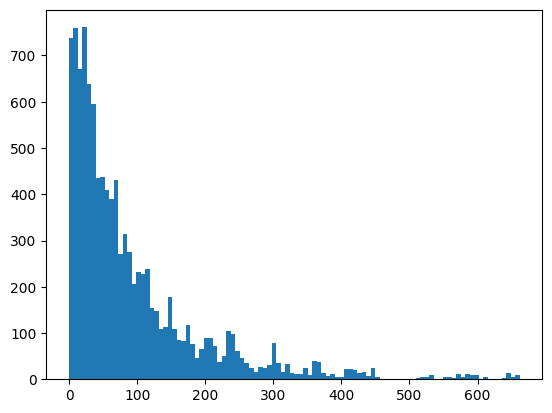

In [139]:
plt.hist([-1 if x is None else x for x in np.array(result)[:,-1]], bins=100)

In [140]:
price_list = prices_list

In [141]:
result = []


# 遍历每个价格
for i in range(len(prices)):
    start_time = float(prices[i]['t'])
    start_price = float(prices[i]['p'])
    trend_up = None
    step_count = 0
    total_percentage_change = 0
    duration = 0  # 初始化持续时间
    
    # 遍历后续价格
    for j in range(i + 1, len(prices)):
        current_time = float(prices[j]['t'])
        current_price = float(prices[j]['p'])
        percentage_change = (current_price - start_price) / start_price
        
        # 如果趋势未定义，定义初始趋势
        if trend_up is None:
            trend_up = percentage_change > 0
        
        # 检查趋势是否反转
        if (percentage_change > 0 and trend_up) or (percentage_change < 0 and not trend_up):
            step_count += 1
            duration = current_time - start_time  # 计算持续时间
            total_percentage_change = (current_price - start_price) / start_price
        else:
            break
    
    result.append([start_time, start_price, step_count, duration * 10**(-3), total_percentage_change])


In [142]:
np.mean(np.array(result)[:, -1])

-5.627665531167256e-05

(array([1.000e+00, 0.000e+00, 4.000e+00, 1.000e+00, 3.000e+00, 3.000e+00,
        0.000e+00, 3.000e+00, 4.000e+00, 2.000e+00, 6.000e+00, 2.000e+00,
        2.000e+00, 0.000e+00, 2.000e+00, 2.000e+00, 1.000e+00, 1.000e+00,
        3.000e+00, 4.000e+00, 2.000e+00, 4.000e+00, 2.000e+00, 0.000e+00,
        2.000e+00, 9.000e+00, 2.000e+00, 5.000e+00, 6.000e+00, 2.000e+00,
        4.000e+00, 2.000e+00, 2.000e+00, 1.000e+00, 1.000e+00, 2.000e+00,
        4.000e+00, 2.000e+00, 6.000e+00, 9.000e+00, 7.000e+00, 2.000e+00,
        7.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 5.000e+00, 1.000e+00,
        0.000e+00, 5.000e+00, 1.000e+00, 2.000e+00, 9.000e+00, 1.000e+01,
        9.000e+00, 1.300e+01, 6.000e+00, 1.800e+01, 4.000e+01, 2.980e+02,
        4.790e+03, 4.698e+03, 5.060e+02, 7.500e+01, 7.000e+00, 5.000e+00,
        2.000e+00, 5.000e+00, 3.000e+00, 6.000e+00, 5.000e+00, 2.000e+00,
        4.000e+00, 4.000e+00, 0.000e+00, 4.000e+00, 4.000e+00, 0.000e+00,
        3.000e+00, 2.000e+00, 3.000e+0

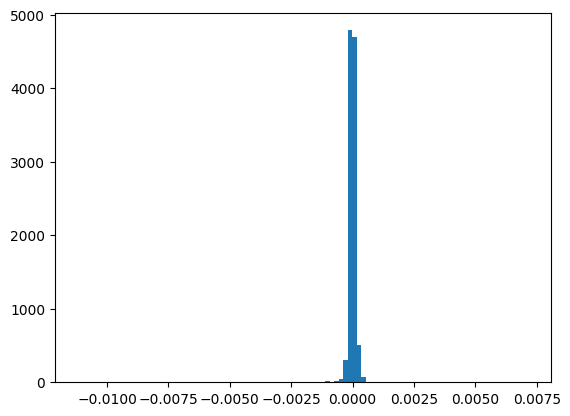

In [143]:
plt.hist(np.array(result)[:, -1], bins= 100)

(array([1.000e+00, 3.000e+00, 3.000e+00, 4.000e+00, 3.000e+00, 4.000e+00,
        0.000e+00, 2.000e+00, 6.000e+00, 1.000e+00, 4.000e+00, 4.000e+00,
        6.000e+00, 2.000e+00, 7.000e+00, 1.300e+01, 5.000e+00, 6.000e+00,
        9.000e+00, 1.400e+01, 1.200e+01, 1.700e+01, 1.700e+01, 1.700e+01,
        1.700e+01, 2.300e+01, 2.000e+01, 2.300e+01, 3.100e+01, 2.900e+01,
        3.300e+01, 4.200e+01, 5.600e+01, 9.800e+01, 5.700e+01, 7.900e+01,
        9.400e+01, 9.000e+01, 1.180e+02, 1.330e+02, 1.650e+02, 3.410e+02,
        2.350e+02, 2.390e+02, 2.730e+02, 3.040e+02, 3.940e+02, 4.670e+02,
        5.880e+02, 1.017e+03, 1.221e+03, 5.730e+02, 4.140e+02, 3.570e+02,
        2.820e+02, 2.450e+02, 2.030e+02, 2.100e+02, 3.340e+02, 1.570e+02,
        1.040e+02, 1.100e+02, 9.800e+01, 8.200e+01, 9.700e+01, 7.600e+01,
        1.030e+02, 8.300e+01, 4.800e+01, 4.300e+01, 3.000e+01, 4.400e+01,
        3.100e+01, 3.300e+01, 3.200e+01, 2.600e+01, 2.700e+01, 1.800e+01,
        2.100e+01, 1.800e+01, 1.600e+0

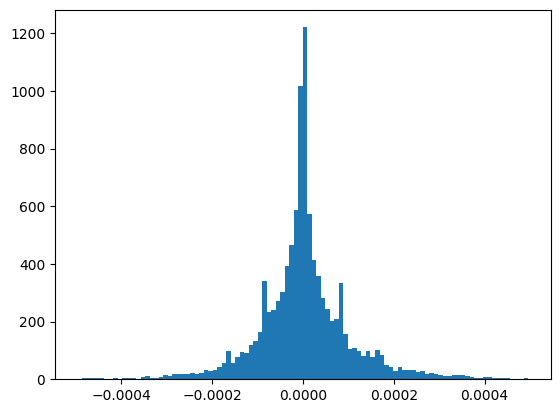

In [149]:
plt.hist([num for num in np.array(result)[:, -1] if -0.0005 <= num <= 0.0005], bins=100)

(array([2.207e+03, 0.000e+00, 1.970e+02, 0.000e+00, 1.220e+02, 0.000e+00,
        7.700e+01, 0.000e+00, 5.200e+01, 0.000e+00, 3.700e+01, 0.000e+00,
        7.500e+01, 0.000e+00, 3.200e+01, 0.000e+00, 2.800e+01, 0.000e+00,
        1.700e+01, 0.000e+00, 2.800e+01, 0.000e+00, 1.600e+01, 0.000e+00,
        2.200e+01, 0.000e+00, 1.900e+01, 0.000e+00, 1.000e+01, 0.000e+00,
        1.800e+01, 0.000e+00, 1.600e+01, 0.000e+00, 1.300e+01, 0.000e+00,
        1.600e+01, 0.000e+00, 8.000e+00, 0.000e+00, 9.000e+00, 0.000e+00,
        3.000e+00, 0.000e+00, 1.400e+01, 0.000e+00, 3.000e+00, 0.000e+00,
        6.000e+00, 0.000e+00, 0.000e+00, 7.000e+00, 0.000e+00, 7.000e+00,
        0.000e+00, 4.000e+00, 0.000e+00, 1.200e+01, 0.000e+00, 1.400e+01,
        0.000e+00, 1.600e+01, 0.000e+00, 2.000e+00, 0.000e+00, 1.300e+01,
        0.000e+00, 5.000e+00, 0.000e+00, 4.000e+00, 0.000e+00, 1.500e+01,
        0.000e+00, 5.000e+00, 0.000e+00, 9.000e+00, 0.000e+00, 7.000e+00,
        0.000e+00, 4.000e+00, 0.000e+0

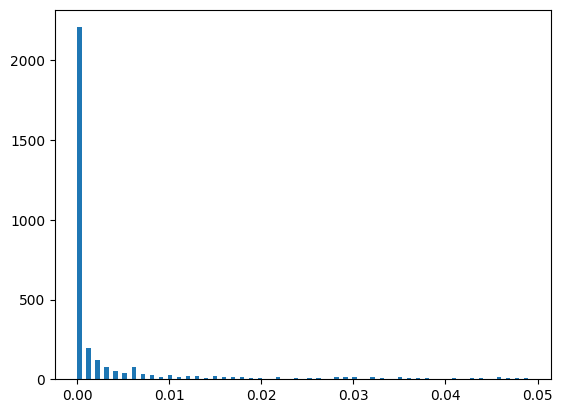

In [150]:
plt.hist([num for num in np.array(result)[:, 3] if num < 0.05], bins=100)

(array([ 300., 1496.,  911.,  703.,  548.,  433.,  347.,  290.,  273.,
         228.,  199.,  186.,  162.,  145.,  142.,  120.,  110.,  107.,
          97.,   94.,   74.,   87.,   63.,   77.,   67.,   54.,   43.,
          63.,   57.,   49.,   48.,   57.,   49.,   51.,   43.,   36.,
          42.,   30.,   45.,   38.,   39.,   39.,   35.,   36.,   32.,
          31.,   25.,   30.,   25.,   31.]),
 array([ 0.  ,  0.98,  1.96,  2.94,  3.92,  4.9 ,  5.88,  6.86,  7.84,
         8.82,  9.8 , 10.78, 11.76, 12.74, 13.72, 14.7 , 15.68, 16.66,
        17.64, 18.62, 19.6 , 20.58, 21.56, 22.54, 23.52, 24.5 , 25.48,
        26.46, 27.44, 28.42, 29.4 , 30.38, 31.36, 32.34, 33.32, 34.3 ,
        35.28, 36.26, 37.24, 38.22, 39.2 , 40.18, 41.16, 42.14, 43.12,
        44.1 , 45.08, 46.06, 47.04, 48.02, 49.  ]),
 <BarContainer object of 50 artists>)

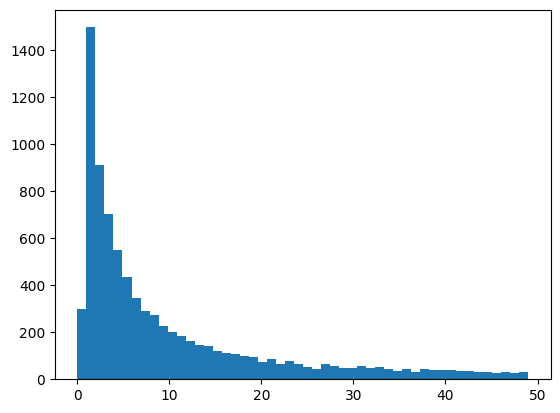

In [151]:
plt.hist([num for num in np.array(result)[:, 2] if num < 50], bins=50)

In [160]:
# 要多少时间才能达成一次网格交易
amplitude_threshold = 0.001
durations = []
n = len(prices)

for i in range(n):
    start_time = float(prices[i]['t']) * 10**(-3)
    start_price = float(prices[i]['p']) * 10**(-3)
    found_high = False
    found_low = False

    for j in range(i + 1, n):
        current_time = float(prices[j]['t']) * 10**(-3)
        current_price = float(prices[j]['p']) * 10**(-3)

        price_change = ((current_price - start_price) / start_price) 

        if price_change >= amplitude_threshold:
            found_high = True
        if price_change <= -amplitude_threshold:
            found_low = True

        if found_high and found_low:
            durations.append({'start_time': start_time, 'duration': current_time - start_time})
            break

    if not (found_high and found_low):
        durations.append({'start_time': start_time, 'duration': None})


In [157]:
durations

[{'start_time': 1719154178.88, 'duration': 2.431999921798706},
 {'start_time': 1719154178.88, 'duration': 2.431999921798706},
 {'start_time': 1719154178.88, 'duration': 2.431999921798706},
 {'start_time': 1719154178.88, 'duration': 2.431999921798706},
 {'start_time': 1719154178.88, 'duration': 6.927999973297119},
 {'start_time': 1719154178.88, 'duration': 6.927999973297119},
 {'start_time': 1719154179.003, 'duration': 6.806999921798706},
 {'start_time': 1719154179.216, 'duration': 9.704999923706055},
 {'start_time': 1719154181.312, 'duration': 74.73000001907349},
 {'start_time': 1719154183.918, 'duration': 60.11800003051758},
 {'start_time': 1719154185.808, 'duration': 23.56599998474121},
 {'start_time': 1719154185.808, 'duration': 23.55999994277954},
 {'start_time': 1719154185.808, 'duration': 15.0},
 {'start_time': 1719154185.808, 'duration': 15.0},
 {'start_time': 1719154185.808, 'duration': 15.0},
 {'start_time': 1719154185.81, 'duration': 3.1110000610351562},
 {'start_time': 17191

In [164]:
with open('result.json', 'w') as file:
    json.dump(durations, file, indent=4)


In [162]:
# 单边需要多少时间达到阈值
threshold = 0.001
durations = []
n = len(prices)

for i in range(n):
    start_time = float(prices[i]['t']) * 10**(-3)
    start_price = float(prices[i]['p']) * 10**(-3)
    found = False

    for j in range(i + 1, n):
        current_time = float(prices[j]['t']) * 10**(-3)
        current_price = float(prices[j]['p']) * 10**(-3)

        price_change = ((current_price - start_price) / start_price)

        if abs(price_change) >= threshold:
            durations.append({'start_time': start_time, 'duration': current_time - start_time})
            found = True
            break

    if not found:
        durations.append({'start_time': start_time, 'duration': None})



In [163]:
durations

[{'start_time': 1719154178.88, 'duration': 54.84599995613098},
 {'start_time': 1719154178.88, 'duration': 60.47000002861023},
 {'start_time': 1719154178.88, 'duration': 60.47000002861023},
 {'start_time': 1719154178.88, 'duration': 60.47000002861023},
 {'start_time': 1719154178.88, 'duration': 60.47000002861023},
 {'start_time': 1719154178.88, 'duration': 60.47000002861023},
 {'start_time': 1719154179.003, 'duration': 60.34700012207031},
 {'start_time': 1719154179.216, 'duration': 60.134000062942505},
 {'start_time': 1719154181.312, 'duration': 52.414000034332275},
 {'start_time': 1719154183.918, 'duration': 49.80800008773804},
 {'start_time': 1719154185.808, 'duration': 53.54200005531311},
 {'start_time': 1719154185.808, 'duration': 53.54200005531311},
 {'start_time': 1719154185.808, 'duration': 53.54200005531311},
 {'start_time': 1719154185.808, 'duration': 53.54200005531311},
 {'start_time': 1719154185.808, 'duration': 53.54200005531311},
 {'start_time': 1719154185.81, 'duration': 7

In [18]:
threshold = 0.001
durations = []
n = len(prices)

for i in range(n):
    start_time = float(prices[i]['t']) * 10**(-3)
    start_price = float(prices[i]['p']) * 10**(-3)
    found_up = False
    found_down = False

    up_duration = None
    down_duration = None

    for j in range(i + 1, n):
        current_time = float(prices[j]['t']) * 10**(-3)
        current_price = float(prices[j]['p']) * 10**(-3)

        price_change = ((current_price - start_price) / start_price)

        if not found_up and price_change >= threshold:
            up_duration = current_time - start_time
            found_up = True

        if not found_down and price_change <= -threshold:
            down_duration = current_time - start_time
            found_down = True

        if found_up and found_down:
            break

    durations.append({'start_time': start_time, 'up_duration': up_duration, 'down_duration': down_duration})


In [19]:
with open('result.json', 'w') as file:
    json.dump(durations, file, indent=4)
